## Utilizing Expert Knowledge

- Introduction to Machine Learning with Python
- page 242

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import mglearn

In [5]:
citibike = mglearn.datasets.load_citibike()

`citibike` is `pandas.Series` datatype

In [9]:
type(citibike)

pandas.core.series.Series

In [14]:
citibike.head()

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64

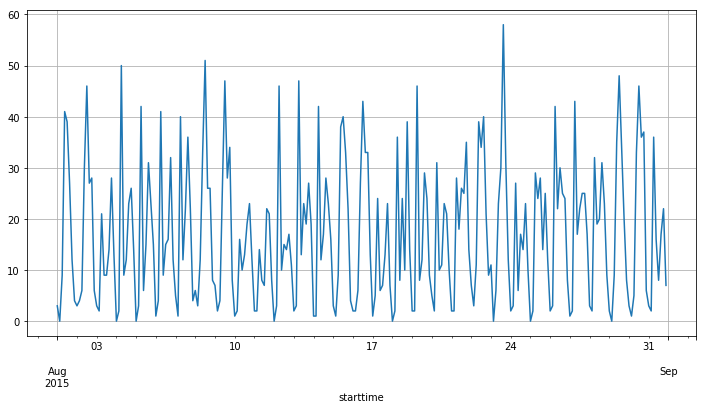

In [15]:
citibike.plot(figsize=(12,6), grid=True)

You can see how to put data/time/year in the plot index!

- check the doc. about `plt.xtics()`

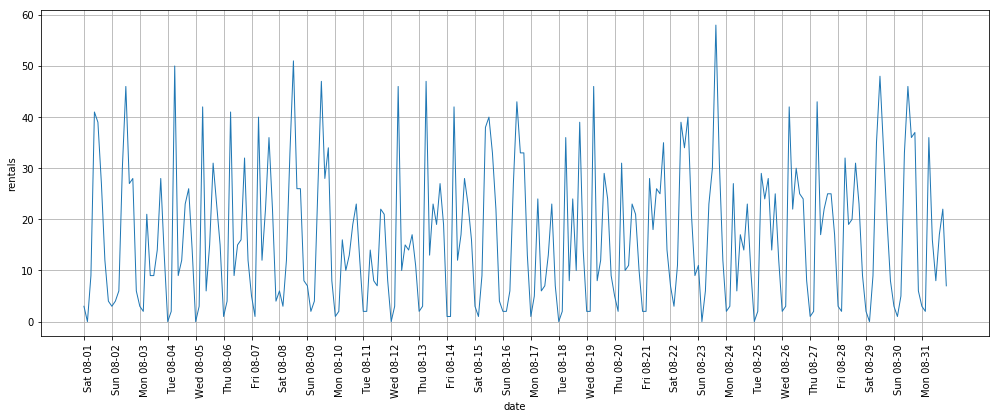

In [23]:
plt.figure (figsize=(17,6))
xtic = pd.date_range (start=citibike.index.min(), end=citibike.index.max(), freq='d')
plt.xticks (xtic, xtic.strftime('%a %m-%d'), rotation=90, ha='left')
plt.plot (citibike, linewidth=1)
plt.xlabel ('date')
plt.ylabel ('rentals')
plt.grid (True)

See what `xtic` looks like.

In [17]:
xtic

DatetimeIndex(['2015-08-01', '2015-08-02', '2015-08-03', '2015-08-04',
               '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08',
               '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12',
               '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16',
               '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20',
               '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24',
               '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28',
               '2015-08-29', '2015-08-30', '2015-08-31'],
              dtype='datetime64[ns]', freq='D')

And this too, which was used as the index in the graph.

In [24]:
xtic.strftime('%a %m-%d')

Index(['Sat 08-01', 'Sun 08-02', 'Mon 08-03', 'Tue 08-04', 'Wed 08-05',
       'Thu 08-06', 'Fri 08-07', 'Sat 08-08', 'Sun 08-09', 'Mon 08-10',
       'Tue 08-11', 'Wed 08-12', 'Thu 08-13', 'Fri 08-14', 'Sat 08-15',
       'Sun 08-16', 'Mon 08-17', 'Tue 08-18', 'Wed 08-19', 'Thu 08-20',
       'Fri 08-21', 'Sat 08-22', 'Sun 08-23', 'Mon 08-24', 'Tue 08-25',
       'Wed 08-26', 'Thu 08-27', 'Fri 08-28', 'Sat 08-29', 'Sun 08-30',
       'Mon 08-31'],
      dtype='object')

The data values can be retrieved from `pd.Series`

In [29]:
y = citibike.values
print (citibike.values, type(citibike.values), citibike.shape)

[ 3  0  9 41 39 27 12  4  3  4  6 30 46 27 28  6  3  2 21  9  9 14 28 13
  0  2 50  9 12 23 26 14  0  3 42  6 15 31 23 15  1  4 41  9 15 16 32 12
  5  1 40 12 22 36 22  4  6  3 12 33 51 26 26  8  7  2  4 26 47 28 34  8
  1  2 16 10 13 19 23 12  2  2 14  8  7 22 21  8  0  3 46 10 15 14 17 11
  2  3 47 13 23 19 27 19  1  1 42 12 17 28 23 16  3  1  9 38 40 33 22  4
  2  2  6 27 43 33 33 13  1  5 24  6  7 13 23  7  0  2 36  8 24 10 39 14
  2  2 46  8 12 29 24  9  5  2 31 10 11 23 21 10  2  2 28 18 26 25 35 14
  7  3 11 39 34 40 21  9 11  0  6 23 30 58 31 12  2  3 27  6 17 14 23 10
  0  2 29 24 28 14 25 12  2  3 42 22 30 25 24  8  1  2 43 17 22 25 25 17
  3  2 32 19 20 31 23  9  2  0  9 35 48 34 20  8  3  1  5 33 46 36 37  6
  3  2 36 16  8 17 22  7] <class 'numpy.ndarray'> (248,)


Convert the index into int numbers. Here, POSIX time is calculated from the time string.

In [36]:
X = citibike.index.strftime('%s')
print (X[:10])

Index(['1438354800', '1438365600', '1438376400', '1438387200', '1438398000',
       '1438408800', '1438419600', '1438430400', '1438441200', '1438452000'],
      dtype='object')


In [41]:
X = X.astype (int)
print (X[:10])

Int64Index([1438354800, 1438365600, 1438376400, 1438387200, 1438398000,
            1438408800, 1438419600, 1438430400, 1438441200, 1438452000],
           dtype='int64')


In [50]:
X = citibike.index.strftime('%s').astype('int').values
X.shape, type(X)

((248,), numpy.ndarray)

In [51]:
X = X.reshape(-1,1)
print (X[:10], type(X), X.shape)

[[1438354800]
 [1438365600]
 [1438376400]
 [1438387200]
 [1438398000]
 [1438408800]
 [1438419600]
 [1438430400]
 [1438441200]
 [1438452000]] <class 'numpy.ndarray'> (248, 1)
